## Rag pipeline 

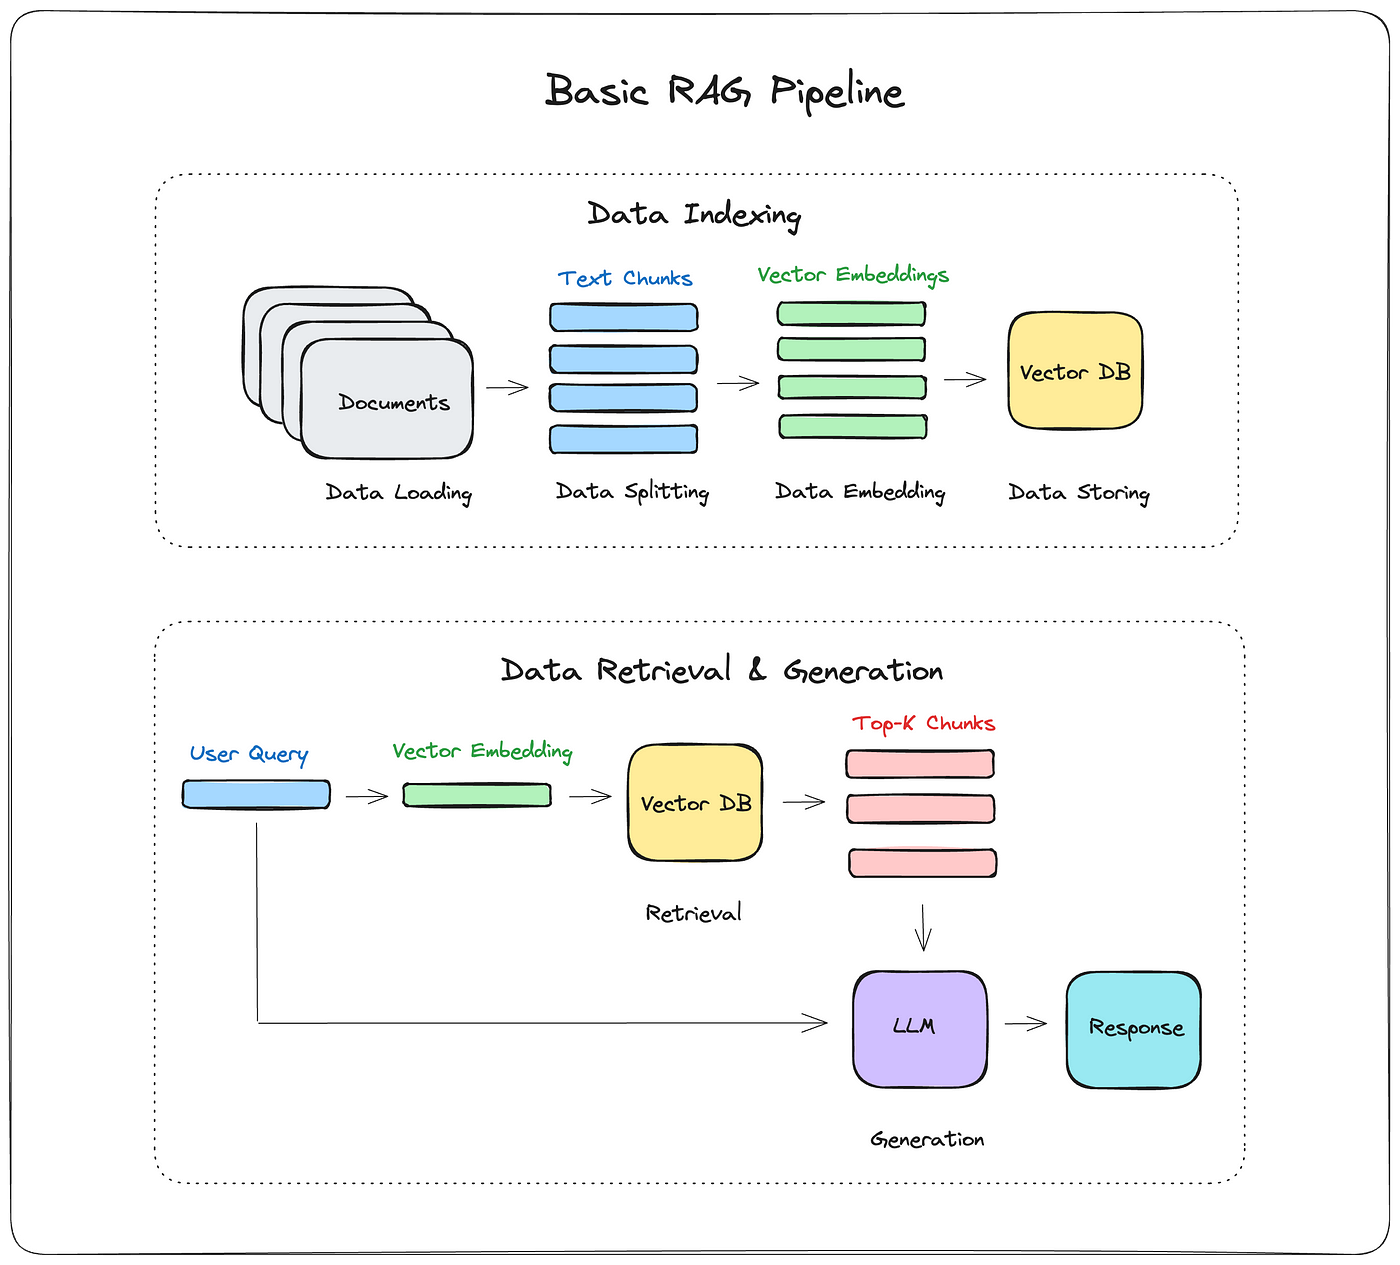

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")

In [3]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("Fire1.pdf")
text = loader.load()
text

[Document(metadata={'source': 'Fire1.pdf', 'page': 0}, page_content='ORIGINAL ARTICLE\nAn improved fire detection approach based on YOLO-v8 for smart\ncities\nFatma M. Talaat1•Hanaa ZainEldin2\nReceived: 28 March 2023 / Accepted: 28 June 2023 / Published online: 28 July 2023\n/C211The Author(s) 2023\nAbstract\nFires in smart cities can have devastating consequences, causing damage to property, and endangering the lives of citizens.Traditional ﬁre detection methods have limitations in terms of accuracy and speed, making it challenging to detect ﬁres in\nreal time. This paper proposes an improved ﬁre detection approach for smart cities based on the YOLOv8 algorithm, called\nthe smart ﬁre detection system (SFDS), which leverages the strengths of deep learning to detect ﬁre-speciﬁc features in realtime. The SFDS approach has the potential to improve the accuracy of ﬁre detection, reduce false alarms, and be cost-\neffective compared to traditional ﬁre detection methods. It can also be exte

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap = 200)
document = text_splitter.split_documents(text)
document[10:31]

[Document(metadata={'source': 'Fire1.pdf', 'page': 0}, page_content='fatma.nada@ai.kfs.edu.eg\nHanaa ZainEldin\neng.hanaa2011@gmail.com\n1Faculty of Artiﬁcial Intelligence, Kafrelsheikh University,\nKafrelsheikh, Egypt\n2Computers and Control Systems Engineering Department,\nFaculty of Engineering, Mansoura University, Mansoura,Egypt\n123Neural Computing and Applications (2023) 35:20939–20954\nhttps://doi.org/10.1007/s00521-023-08809-1 (0123456789().,-volV) (0123456789(). ,- volV)'),
 Document(metadata={'source': 'Fire1.pdf', 'page': 1}, page_content='characteristics. A sensor-based detection system [ 5] may\nnot be viable in some situations, such as those involving\nwide coverage areas, untamed (forest areas), or high tem-\nperatures, as it will provide a lot of false alerts [ 6].\nTraditionally, ﬁre detection systems have depended on\ntemperature, gases, and smoke sensors, which have been\nestablished to be successful for small ﬁres but ineffectivefor larger ﬁres that can grow rapidl

In [9]:
#vector embedding and vector store using FAISS
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
db = FAISS.from_documents(document[10:31], OllamaEmbeddings())


In [18]:
query = "Explain why its versatile?"
result = db.similarity_search(query)
result[0].page_content

'real time. This makes the proposed approach well-\nsuited for smart city applications where quick andtimely detection of ﬁres is critical.\n•Versatility: The proposed approach can be easily\nadapted to detect other objects of interest in smartcities, making it a versatile tool for various applications\nbeyond ﬁre detection. For instance, it can be used to\ndetect other safety hazards, such as gas leaks orﬂooding, or to monitor trafﬁc and pedestrian ﬂow in\ncrowded areas.'

In [12]:
from langchain_community.llms import Ollama
from langchain_core.prompts import ChatPromptTemplate

llm = Ollama(model = "llama2")
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context. 
Think step by step before providing a detailed answer. 
I will tip you $1000 if the user finds the answer helpful. 
<context>
{context}
</context>
Question: {input}
""")


### This chain takes a list of documents and formats them all into a prompt, then passes that prompt to an LLM. It passes ALL documents, so you should make sure it fits within the context window of the LLM you are using.

### A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them. Vector stores can be used as the backbone of a retriever, but there are other types of retrievers as well.

In [13]:
#chain introduction and retrieval
from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain = create_stuff_documents_chain(llm, prompt)

In [14]:
retriever = db.as_retriever()

In [15]:
from langchain.chains import create_retrieval_chain
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [16]:
response = retrieval_chain.invoke({'input': 'Explain why its versatile?'})

In [17]:
response['answer']

'The proposed approach is versatile because it can be easily adapted to detect other objects of interest in smart cities beyond fire detection. This is evident in the following reasons:\n\n1. Safety hazards: The proposed approach can be used to detect other safety hazards such as gas leaks or flooding, which are critical in smart cities.\n2. Traffic and pedestrian flow: The approach can monitor trafﬁc and pedestrian ﬂow in crowded areas, which is essential for maintaining public safety in smart cities.\n3. Adaptability: Deep learning algorithms used in the proposed approach are highly adaptable, enabling it to learn and detect new features beyond fire detection.\n4. Low-cost hardware: The use of low-cost cameras and hardware makes the proposed approach cost-effective and practical for smart cities with limited resources.\n5. Large dataset: The availability of a large dataset containing ﬁre, smoke, and normal scenes provides the algorithm with a diverse range of ﬁrescenarios to learn fr

### with the help of chain stuff document and retriever the quality of answer got improved